### PROBLEM STATEMENT
#### TECHNOLOGY: DATA SCIENCE
Students from different cities from the state of Maharashtra had applied for the Cloud
Counselage Internship Program. We have the dataset of consisting information of all the
students. Using this data we want to get more insights and draw out more meaningful
conclusions. Interns are expected to build a data visualization model and find the best data
segmentation model using the student’s dataset. Following are the tasks interns need to
perform :
1. Interns need to preprocess the data for missing values, unknown values, encoding
categorical values.
2. Create a data visualization model to build graphs from the dataset answering the
following questions:
a. The number of students applied to different technologies.
b. The number of students applied for Data Science who knew ‘’Python” and
who didn’t.
c. The different ways students learned about this program.
d. Students who are in the fourth year and have a CGPA greater than 8.0.
e. Students who applied for Digital Marketing with verbal and written
communication score greater than 8.
f. Year-wise and area of study wise classification of students.
g. City and college wise classification of students.
h. Plot the relationship between the CGPA and the target variable.
i. Plot the relationship between the Area of Interest and the target variable.
j. Plot the relationship between the year of study, major, and the target variable.
3. Identify the best binary classifier to classify data into “eligible/1” and “not eligible/0”.

Input
Path of the input dataset file
Output
For the data classification, In output print accuracy of the best model identified.
For the data visualization model, in output code need to create a pdf file of all the graphs
generated by the model.


In [1]:
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

## Data Preparation

In [2]:
data=pd.read_csv('DS_DATESET.csv')
df=data
df.shape
#df.head()

(10000, 32)

In [3]:
df.isna().sum()

First Name                                                       0
Last Name                                                        0
City                                                             0
State                                                            0
Zip Code                                                         0
DOB [DD/MM/YYYY]                                                 0
Age                                                              0
Gender                                                           0
Email Address                                                    0
Contact Number                                                   0
Emergency Contact Number                                         0
College name                                                     0
University Name                                                  0
Degree                                                           0
Major/Area of Study                                           

Hence, these 3 columns are full of NaN values:
1. 'Certifications/Achievement/ Research papers'
2. 'Link to updated Resume (Google/ One Drive link preferred)'
3. 'link to Linkedin profile'

As these columns have no data,we will drop these columns


In [4]:
df.drop(['Certifications/Achievement/ Research papers'
,'Link to updated Resume (Google/ One Drive link preferred)'
,'link to Linkedin profile'], axis = 1) 

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24/09/2000,19,Male,bharnes0@harvard.edu,6345186600,...,Artificial Intelligence,Student,Yes,HTML/CSS,Yes,No,6,10,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,...,Cloud Computing,Student,Yes,PHP,No,Yes,10,7,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,...,IoT,Student,Yes,C,No,No,8,6,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26/12/1999,20,Female,rproud3@flavors.me,7507196200,...,Digital Marketing,Student,No,PHP,No,Yes,9,6,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21/09/1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Cloud Computing,Student,No,Python,No,Yes,8,6,Facebook,ineligible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Paulie,Wilden,Sangli,Maharashtra,416410,1/6/2000,19,Male,pwildenrn@sbwire.com,5067103396,...,Machine Learning,Student,Yes,JavaScript,Yes,Yes,9,9,Facebook,eligible
9996,Domini,Napton,Mumbai,Maharashtra,400059,20/07/1998,21,Female,dnaptonro@deviantart.com,9365868127,...,Cyber Security,Student,No,PHP,Yes,Yes,7,7,Friend,eligible
9997,Adoree,Westwick,Kolhapur,Maharashtra,416007,21/03/1998,22,Female,awestwickrp@example.com,7088063119,...,IoT,Student,Yes,C++,Yes,No,7,7,Newspaper,eligible
9998,Germain,Imlen,Sangli,Maharashtra,416415,29/01/2000,20,Female,gimlenrq@theatlantic.com,1662837014,...,Machine Learning,Student,No,JavaScript,Yes,Yes,7,6,Blog post,ineligible


In [5]:
df.columns

Index(['First Name', 'Last Name', 'City', 'State', 'Zip Code',
       'DOB [DD/MM/YYYY]', 'Age', 'Gender', 'Email Address', 'Contact Number',
       'Emergency Contact Number', 'College name', 'University Name', 'Degree',
       'Major/Area of Study', 'Course Type', 'Which-year are you studying in?',
       'CGPA/ percentage', 'Expected Graduation-year', 'Areas of interest',
       'Current Employment Status', 'Have you worked core Java',
       'Programming Language Known other than Java (one major)',
       'Have you worked on MySQL or Oracle database',
       'Have you studied OOP Concepts',
       'Certifications/Achievement/ Research papers',
       'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]',
       'Link to updated Resume (Google/ One Drive link preferred)',
       'link to Linkedin profile', 'How Did You Hear About This Internship?',
       'Label'],
      dtype='object')

In [6]:
print(len(df))

10000


This data contains data of 10000 students who have applied for the Internship Program of Cloud Counselage.

## Data visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", context="notebook")

The following questions are to be answered by data visualization models:
    
#### a) The number of students applied to different technologies.

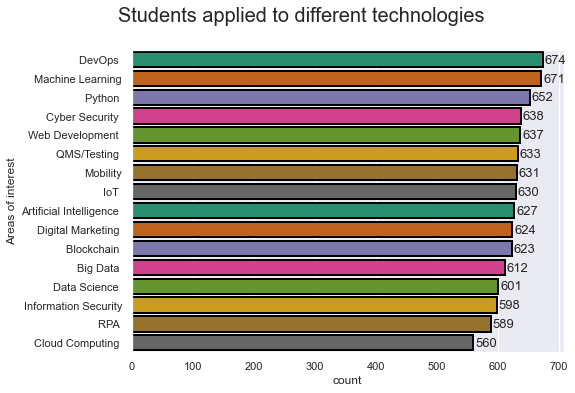

In [8]:
figa,ax=plt.subplots(figsize=(6,6))
plt.suptitle('Students applied to different technologies ',size=20,x=0.6,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)
afig=sns.countplot(y='Areas of interest',data=df,edgecolor=(0,0,0),linewidth=2,palette='Dark2',order = df['Areas of interest'].value_counts().index)
y=df['Areas of interest'].value_counts().tolist()
for index, value in enumerate(y):
    plt.text(value+3, index+0.2, str(value),fontsize=13)

plt.show()

#### b)The number of students applied for Data Science who knew ‘’Python” and who didn’t.


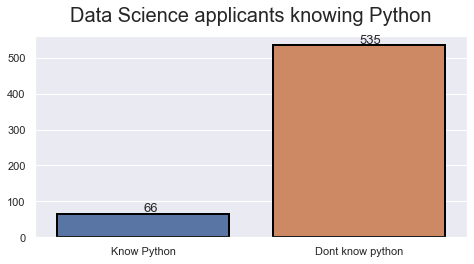

In [9]:
figb,ax=plt.subplots(figsize=(6,4))
plt.suptitle('Data Science applicants knowing Python',size=20,x=0.7,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)

d1=df[df['Areas of interest']=='Data Science ']
y=0
n=0
for i in d1['Programming Language Known other than Java (one major)']:
    if (i=='Python'):
        y+=1
    else:
        n+=1
l1=[y,n]
l2=['Know Python','Dont know python']
bfig=sns.barplot(l2,l1,edgecolor=(0,0,0),linewidth=2)
for index, value in enumerate(l1):
    plt.text(index,value+5, str(value),fontsize=13)
plt.show()

In [10]:
#sns.countplot(y='Programming Language Known other than Java (one major)',data=d1,edgecolor=(0,0,0),linewidth=2,palette='Accent')

#### c)The different ways students learned about this program.

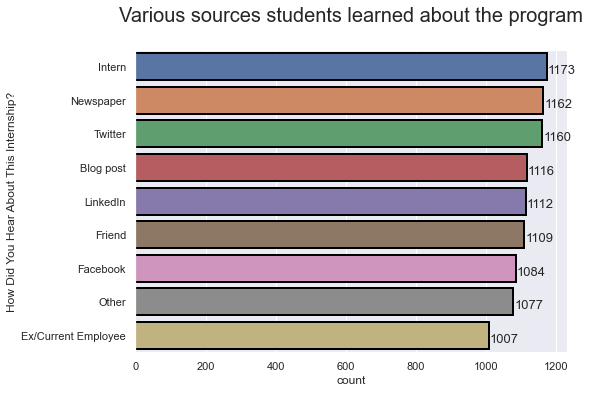

In [11]:
figc,ax=plt.subplots(figsize=(6,6))
plt.suptitle('Various sources students learned about the program',size=20,x=0.7,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)
cfig=sns.countplot(y='How Did You Hear About This Internship?',data=df,color='crimson',edgecolor=(0,0,0),linewidth=2,palette='deep',order=df['How Did You Hear About This Internship?'].value_counts().index)
yc=df['How Did You Hear About This Internship?'].value_counts().tolist()
for index, value in enumerate(yc):
    plt.text(value+3, index+0.2, str(value),fontsize=13)
plt.show()

#### d)Students who are in the fourth year and have a CGPA greater than 8.0.

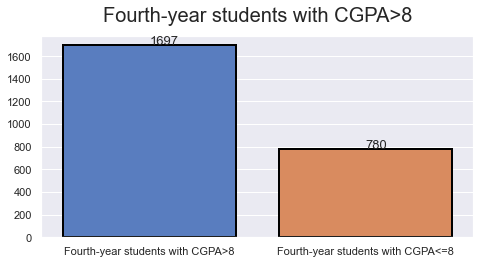

In [12]:
d2=df[['Which-year are you studying in?','CGPA/ percentage',]]
d2=d2[d2['Which-year are you studying in?']=='Fourth-year']
#d2=d2[d2['CGPA/ percentage']>8]
#d2=d2[['CGPA/ percentage']]
d2.head()
g=0
ng=0
for i in d2['CGPA/ percentage']:
    if (i>8):
        g=g+1
    else:
        ng=ng+1
        
len(d2)
l1=[g,ng]

sns.set_palette("Set2")
l2=['Fourth-year students with CGPA>8','Fourth-year students with CGPA<=8']
figd,ax=plt.subplots(figsize=(6,4))
plt.suptitle('Fourth-year students with CGPA>8',size=20,x=0.7,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)

sns.barplot(l2,l1,edgecolor=(0,0,0),linewidth=2,palette='muted')
for index, value in enumerate(l1):
    plt.text(index,value+5, str(value),fontsize=13)
plt.show()
#y=sns.distplot(d2,bins=30,kde=False)
#y.set(xlabel='CGPA',ylabel="Fourth  Year Students frequency")

#### e)Students who applied for Digital Marketing with verbal and written communication score greater than 8.

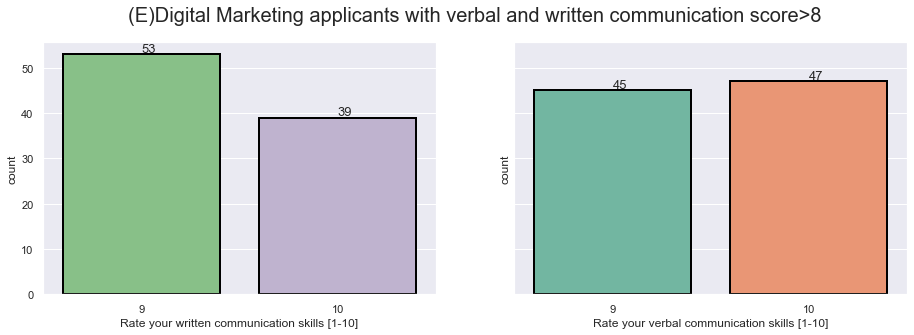

In [54]:
fige,(ax1,ax2)=plt.subplots(1,2,sharey='row')
plt.suptitle('(E)Digital Marketing applicants with verbal and written communication score>8',size=20,x=0.7,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)

fige.set_size_inches(12, 5)
d3=df[(df['Areas of interest']=='Digital Marketing ')&(df['Rate your written communication skills [1-10]']>8)&(df['Rate your verbal communication skills [1-10]']>8)]
                
f1a=sns.countplot(x='Rate your written communication skills [1-10]',data=d3,ax=ax1,edgecolor=(0,0,0),linewidth=2,palette='Accent')
f1b=sns.countplot(x='Rate your verbal communication skills [1-10]',data=d3,ax=ax2,edgecolor=(0,0,0),linewidth=2)
ye1=d3['Rate your written communication skills [1-10]'].value_counts().tolist()
for index, value in enumerate(ye1):
    ax1.text(index,value+0.5, str(value),fontsize=13)
ye2=d3['Rate your verbal communication skills [1-10]'].value_counts().tolist()
ye2.reverse()
#print(ye2)
for index, value in enumerate(ye2):
    ax2.text(index,value+0.5, str(value),fontsize=13)


#### f)Year-wise and area of study wise classification of students.


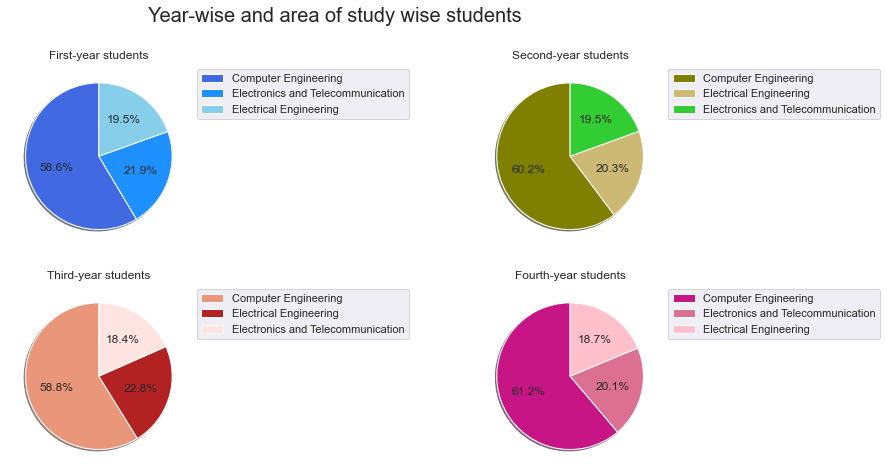

In [14]:
figf,ax= plt.subplots(2,2, subplot_kw=dict(aspect="equal"))
figf.set_size_inches(12,8)
plt.suptitle('Year-wise and area of study wise students',size=20,x=0.7,y=0.9)
dl1=df[df['Which-year are you studying in?']=='First-year']
dl2=df[df['Which-year are you studying in?']=='Second-year']
dl3=df[df['Which-year are you studying in?']=='Third-year']
dl4=df[df['Which-year are you studying in?']=='Fourth-year']
l1=list(dl1['Major/Area of Study'].value_counts())
l2=list(dl1['Major/Area of Study'].value_counts().index)
ax[0,0].pie(l1,startangle=90,autopct='%1.1f%%', shadow=True,colors=['royalblue','dodgerblue','skyblue'],radius=1)
ax[0,0].set_title("First-year students")
l3=list(dl2['Major/Area of Study'].value_counts())
l4=list(dl2['Major/Area of Study'].value_counts().index)
ax[0,1].pie(l3,startangle=90,autopct='%1.1f%%', shadow=True,colors=['olive','y','limegreen'])
ax[0,1].set_title("Second-year students")
l5=list(dl3['Major/Area of Study'].value_counts())
l6=list(dl3['Major/Area of Study'].value_counts().index)
ax[1,0].pie(l5,startangle=90,autopct='%1.1f%%', shadow=True,colors=['darksalmon','firebrick','mistyrose'])
ax[1,0].set_title("Third-year students")
l7=list(dl4['Major/Area of Study'].value_counts())
l8=list(dl4['Major/Area of Study'].value_counts().index)
ax[1,1].pie(l7,startangle=90,autopct='%1.1f%%', shadow=True,colors=['mediumvioletred','palevioletred','pink'])
ax[1,1].set_title("Fourth-year students")
ax[0,0].legend(l2,loc='best',bbox_to_anchor=(1.005,1.005))
ax[0,1].legend(l4,loc='best',bbox_to_anchor=(1.005,1.005))
ax[1,0].legend(l6,loc='best',bbox_to_anchor=(1.005,1.005))
ax[1,1].legend(l8,loc='best',bbox_to_anchor=(1.005,1.005))

plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)



#### g) City and college wise classification of students

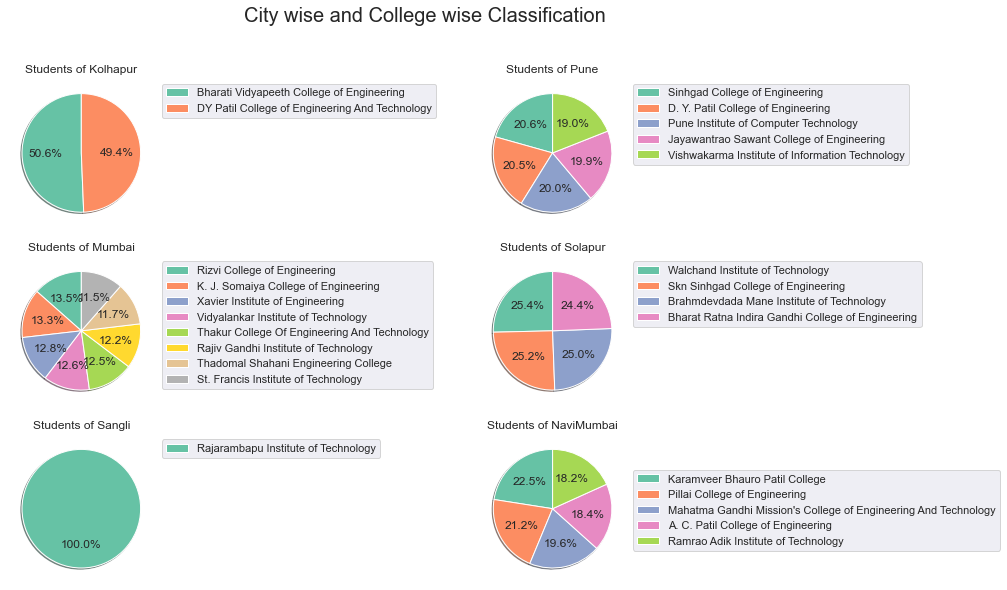

In [15]:
theme = plt.get_cmap('spring')
figg,ax= plt.subplots(3,2, subplot_kw=dict(aspect="equal"),sharex=True)
figg.set_size_inches(15,10)
plt.suptitle('City wise and College wise Classification',size=20,x=0.5,y=0.9)
c1=df[df['City']=='Kolhapur']
c2=df[df['City']=='Pune']
c3=df[df['City']=='Mumbai']
c4=df[df['City']=='Solapur']
c5=df[df['City']=='Sangli']
c6=df[df['City']=='NaviMumbai']
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.8,top=0.8)
ax[0,0].pie(list(c1['College name'].value_counts()),startangle=90,autopct='%1.1f%%', shadow=True)

ax[0,1].pie(list(c2['College name'].value_counts()),startangle=90,autopct='%1.1f%%', shadow=True)
ax[1,0].pie(list(c3['College name'].value_counts()),startangle=90,autopct='%1.1f%%', shadow=True)
ax[1,1].pie(list(c4['College name'].value_counts()),startangle=90,autopct='%1.1f%%', shadow=True)
ax[2,0].pie(list(c5['College name'].value_counts()),startangle=90,autopct='%1.1f%%', shadow=True)
ax[2,1].pie(list(c6['College name'].value_counts()),startangle=90,autopct='%1.1f%%', shadow=True)
ax[0,0].legend(c1['College name'].value_counts().index,loc='best',bbox_to_anchor=(1.005,1.005))
ax[0,1].legend(c2['College name'].value_counts().index,loc='best',bbox_to_anchor=(1.005,1.005))
ax[1,0].legend(c3['College name'].value_counts().index,loc='best',bbox_to_anchor=(1.005,1.005))
ax[1,1].legend(c4['College name'].value_counts().index,loc='best',bbox_to_anchor=(1.005,1.005))
ax[2,0].legend(c5['College name'].value_counts().index,loc='best',bbox_to_anchor=(1.005,1.005))
ax[2,1].legend(c6['College name'].value_counts().index,loc='best',bbox_to_anchor=(1.005,0.8))
ax[0,0].set_title('Students of Kolhapur')
ax[0,1].set_title('Students of Pune')
ax[1,0].set_title('Students of Mumbai')
ax[1,1].set_title('Students of Solapur')
ax[2,0].set_title('Students of Sangli')
ax[2,1].set_title('Students of NaviMumbai')
plt.show()

#### h)Plot the relationship between the CGPA and the target variable.



0       7.26
1       8.73
2       8.61
3       7.96
4       7.07
        ... 
9995    7.69
9996    8.74
9997    8.52
9998    9.22
9999    7.11
Name: CGPA/ percentage, Length: 10000, dtype: float64


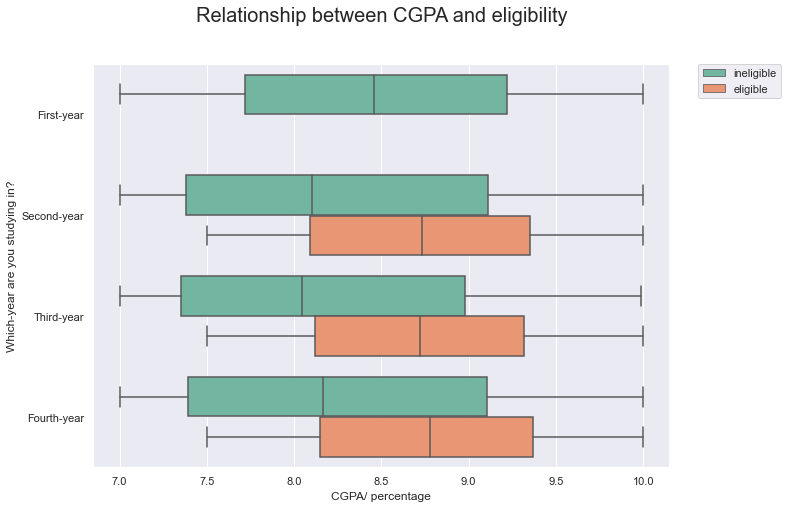

In [16]:
#sns.barplot(x='CGPA/ percentage',y='Label')
d4=df
figh,ax=plt.subplots(figsize=(8,8))
plt.suptitle('Relationship between CGPA and eligibility',size=20,x=0.7,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)

#d4['CGPA/ percentage']=d4['CGPA/ percentage'].astype(int)
print(d4['CGPA/ percentage'])
x=sns.boxplot(x='CGPA/ percentage',y='Which-year are you studying in?',hue='Label',data=d4,dodge=True,order=['First-year','Second-year','Third-year','Fourth-year'],palette='Set2')
x.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

#### i)Plot the relationship between the Area of Interest and the target variable.

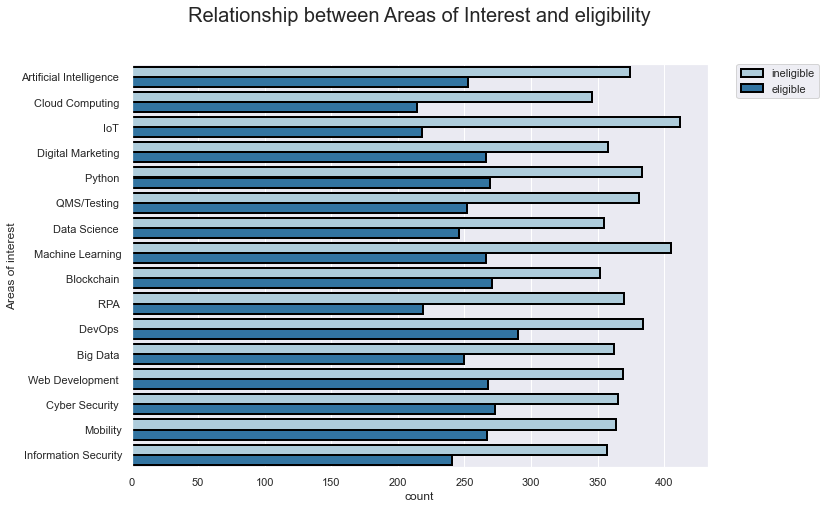

In [17]:
figi,ax=plt.subplots(figsize=(8,8))
plt.suptitle('Relationship between Areas of Interest and eligibility',size=20,x=0.7,y=0.9)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.2,top=0.8)

g=sns.countplot(y='Areas of interest',hue='Label',data=d4,edgecolor=(0,0,0),linewidth=2,palette='Paired')

g.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

#### j)Plot the relationship between the year of study, major, and the target variable

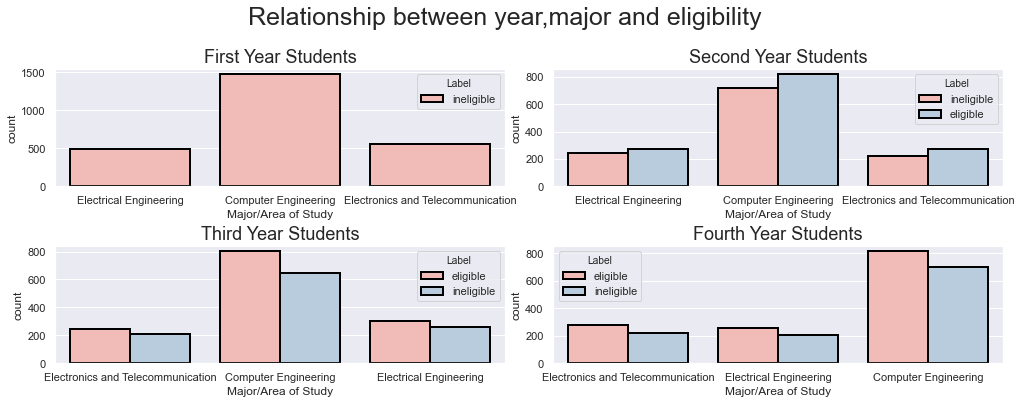

In [18]:
figj,ax= plt.subplots(2,2)
figj.set_size_inches(14,5)
plt.suptitle('Relationship between year,major and eligibility',size=25,x=0.5,y=1.1)
plt.subplots_adjust(left=0, bottom=0.2, right=1.5,top=1)

sns.countplot(x='Major/Area of Study',hue='Label',data=dl1,ax=ax[0,0],edgecolor=(0,0,0),linewidth=2,palette='Pastel1')
ax[0,0].set_title('First Year Students',fontsize=18)
sns.countplot(x='Major/Area of Study',hue='Label',data=dl2,ax=ax[0,1],edgecolor=(0,0,0),linewidth=2,palette='Pastel1')
ax[0,1].set_title('Second Year Students',fontsize=18)
sns.countplot(x='Major/Area of Study',hue='Label',data=dl3,ax=ax[1,0],edgecolor=(0,0,0),linewidth=2,palette='Pastel1')
ax[1,0].set_title('Third Year Students',fontsize=18)
sns.countplot(x='Major/Area of Study',hue='Label',data=dl4,ax=ax[1,1],edgecolor=(0,0,0),linewidth=2,palette='Pastel1')
ax[1,1].set_title('Fourth Year Students',fontsize=18)

#plt.subplots_adjust(left=0, bottom=0.0, right=1.2,)
#plt.subplots_adjust(top=2.2)
figj.tight_layout(pad=0.5)

In [19]:
with PdfPages('visualization-output.pdf') as pdf:
    pdf.savefig(figa,bbox_inches='tight')
    pdf.savefig(figb,bbox_inches='tight')
    pdf.savefig(figc,bbox_inches='tight')
    pdf.savefig(figd,bbox_inches='tight')
    pdf.savefig(fige,bbox_inches='tight')
    pdf.savefig(figf,bbox_inches='tight')
    pdf.savefig(figg,bbox_inches='tight')
    pdf.savefig(figh,bbox_inches='tight')
    pdf.savefig(figi,bbox_inches='tight')
    pdf.savefig(figj,bbox_inches='tight')

### Best Binary Classifier for deciding Eligibility

#### Encoding categorical values

In [20]:
features=['Gender','Major/Area of Study','Which-year are you studying in?','CGPA/ percentage',
          'Have you worked core Java',
       'Have you worked on MySQL or Oracle database',
      'Have you studied OOP Concepts',
      'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]']
x=df[features]

y=pd.get_dummies(df['Label']).drop(['ineligible'],axis=1)
y=np.ravel(y)
#t1 = pd.concat([x_train,y_train], axis=1, sort=False)
#t1.head()
encode={"Gender": {'Male': 0, 'Female': 1 },
"Which-year are you studying in?": {'First-year':1,'Second-year':2,'Third-year':3,'Fourth-year':4},
'Have you worked core Java':{'Yes':1,'No':0},
'Have you worked on MySQL or Oracle database':{'Yes':1,'No':0},
'Have you studied OOP Concepts':{'Yes':1,'No':0},
'Major/Area of Study':{'Computer Engineering':1,'Electrical Engineering':2,'Electronics and Telecommunication':3}}
x.replace(encode, inplace=True)


c:\users\lalita\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [21]:
import sklearn as sk
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)
def MSE(preds, labs):
    diff = [(int(x)-int(y))**2 for x,y in zip(preds,labs)]
    return sum(diff) / len(diff)

In [23]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'f1_weighted']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR.fit(X_train,y_train)
predictions = LR.predict(X_train)
lrms=MSE(predictions,y_train)

In [24]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA.fit(X_train,y_train)
predictions = LDA.predict(X_train)
lmse=MSE(predictions,y_train)

In [25]:
SVM = SVC(probability = True)


scoring = ['accuracy', 'precision_macro', 'f1_weighted']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM.fit(X_train,y_train)
predictions = SVM.predict(X_train)
smse=MSE(predictions,y_train)

In [26]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'f1_weighted']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes.fit(X_train,y_train)
predictions = bayes.predict(X_train)
bmse=MSE(predictions,y_train)

In [27]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'f1_weighted']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_train)
kmse=MSE(predictions,y_train)

In [28]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'f1_weighted']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA.fit(X_train,y_train)
predictions = QDA.predict(X_train)
qmse=MSE(predictions,y_train)


In [29]:
models = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'K-Nearest Neighbors', 'Bayes'],
    'F1_score'    : [LR_f1, SVM_f1, LDA_f1, QDA_f1,  KNN_f1, bayes_f1],
    'Accuracy'    : [LR_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, SVM_precision, LDA_precision, QDA_precision,  KNN_precision, bayes_precision],
    'Mean-Squared Error'         : [lrms, smse, lmse, qmse,  kmse, bmse]
    }, columns = ['Model','Accuracy', 'Precision','F1_score','MSE'])
models.sort_values(by='F1_score', ascending=False)

,Model,Accuracy,Precision,F1_score,MSE
4,K-Nearest Neighbors,0.958750,0.955891,0.958850,NaN
1,Support Vector Machine,0.921625,0.923226,0.921237,NaN
5,Bayes,0.867250,0.883323,0.863904,NaN
3,Quadratic Discriminant Analysis,0.857000,0.865754,0.854317,NaN
0,Logistic Regression,0.772875,0.767105,0.771535,NaN
2,Linear Discriminant Analysis,0.771250,0.764995,0.770224,NaN


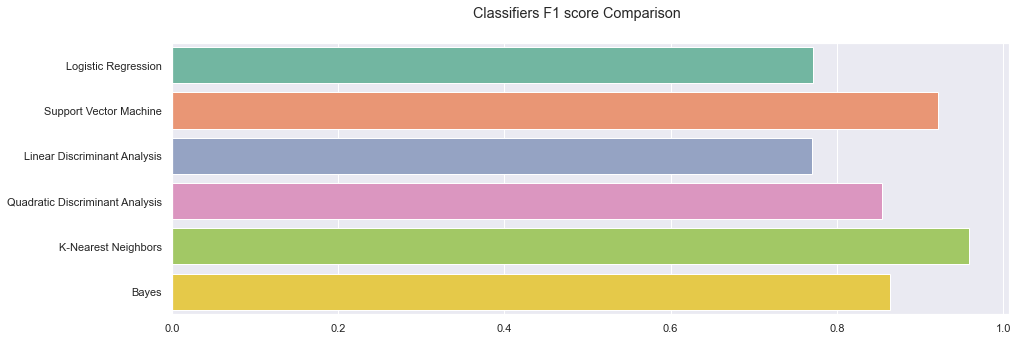

In [30]:
results=[]
for i in models['F1_score']:
    results.append(i)
names=models['Model'].to_list()
fig = plt.figure()
fig.set_size_inches(15,5)
fig.suptitle('Classifiers F1 score Comparison')
ax = fig.add_subplot(111)
compare=sns.barplot(y=names,x=results)
#compare.savefig("output.png")

### Therefore, K-nearest Neighbors(KNN) works as the best Binary Classifier for this model.

In [31]:
# ### Best Binary Classifier for deciding Eligibility

# #### Importing necessary libraries

import pandas as pd
import numpy as np

path=input('Enter file path\n')
data=pd.read_csv(path)
df=data

# #### Encoding categorical values

import warnings
warnings.filterwarnings("ignore")

features=['Gender','Major/Area of Study','Which-year are you studying in?','CGPA/ percentage',
          'Have you worked core Java',
       'Have you worked on MySQL or Oracle database',
      'Have you studied OOP Concepts',
      'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]']
x=df[features]

y=pd.get_dummies(df['Label']).drop(['ineligible'],axis=1)
y=np.ravel(y)

encode={"Gender": {'Male': 0, 'Female': 1 },
"Which-year are you studying in?": {'First-year':1,'Second-year':2,'Third-year':3,'Fourth-year':4},
'Have you worked core Java':{'Yes':1,'No':0},
'Have you worked on MySQL or Oracle database':{'Yes':1,'No':0},
'Have you studied OOP Concepts':{'Yes':1,'No':0},
'Major/Area of Study':{'Computer Engineering':1,'Electrical Engineering':2,'Electronics and Telecommunication':3}}
x.replace(encode, inplace=True)

import sklearn as sk
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

LR = LogisticRegression()
LR.fit(X_train,y_train)
lrpreds=LR.predict(X_train)
LR_f1 = f1_score(y_train,lrpreds)



LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
ldapreds=LDA.predict(X_train)
LDA_f1 = f1_score(y_train,ldapreds)

SVM = SVC(probability = True)
SVM.fit(X_train,y_train)
svpreds=SVM.predict(X_train)
SVM_f1 = f1_score(y_train,svpreds)



bayes = GaussianNB()
bayes.fit(X_train,y_train)
bpreds=bayes.predict(X_train)
bayes_f1 = f1_score(y_train,bpreds)



KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
kpreds=KNN.predict(X_train)
KNN_f1 = f1_score(y_train,kpreds)


QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
qpreds=QDA.predict(X_train)
QDA_f1 = f1_score(y_train,qpreds)
F1_score =[LR_f1, SVM_f1, LDA_f1, QDA_f1,  KNN_f1, bayes_f1]


# ### Therefore, K-nearest Neighbors(KNN) works as the best Binary Classifier for this model.


#print(F1_score)
print('F1 score obtained by KNN classifier is ',max(F1_score))

Enter file path
kfjksdf


FileNotFoundError: [Errno 2] File kfjksdf does not exist: 'kfjksdf'